In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

In [95]:
df = pd.read_csv("data/df_cleaned.csv")
df.head()

,event_id,player_id_home,name_home,seed_home,aces_home,backhand_errors_home,backhand_unforced_errors_home,backhand_winners_home,breakpoints_won_home,double_faults_home,...,win_home,avg_set_length,avg_game_length,avg_points_per_game,match_length,rs_home,rs_away,avg_set_diff,avg_set_games,sets
0,sr:sport_event:42023445,sr:competitor:66968,"Kudermetova, Veronika",0,14,13,8,9,1,1,...,True,50.983333,4.433333,6.913043,101.966667,12.0,101.0,1.500000,11.500000,2
1,sr:sport_event:42023447,sr:competitor:41355,"Bogdan, Ana",1,6,12,7,7,3,2,...,True,72.141667,5.549359,6.769231,144.283333,61.0,15.0,1.000000,13.000000,2
2,sr:sport_event:42023449,sr:competitor:256547,"Parks, Alycia",1,5,8,17,3,4,5,...,True,50.866667,5.354386,7.210526,101.733333,47.0,87.0,2.500000,9.500000,2
3,sr:sport_event:42023459,sr:competitor:99131,"Bucsa, Cristina",1,6,34,15,10,6,4,...,True,54.772222,5.134896,7.187500,164.316667,77.0,70.0,0.666667,10.666667,3
4,sr:sport_event:42023461,sr:competitor:44834,"Pegula, Jessica",0,3,20,14,11,5,3,...,True,46.783333,4.678333,6.600000,140.350000,4.0,44.0,2.000000,10.000000,3


Combining similar variables (winners and errors)

In [96]:
errors = []
unforced_errors = []
winners = []
for col in df.columns:
    if "errors" in col:
        er = re.match(r"^(.+_errors)(_[a-z]+)$", col).group(1) 
        if "unforced" in col:
            if er not in unforced_errors:
                unforced_errors.append(er)
        else:
            if er not in errors:
                errors.append(er)
    elif "winners" in col:
        win = re.match(r"^(.+_winners)(_[a-z]+)$", col).group(1) 
        if win not in winners:
            winners.append(win)

print(errors)
print(unforced_errors)
print(winners)


['backhand_errors', 'forehand_errors', 'groundstroke_errors', 'overhead_stroke_errors', 'return_errors']
['backhand_unforced_errors', 'drop_shot_unforced_errors', 'forehand_unforced_errors', 'groundstroke_unforced_errors', 'lob_unforced_errors', 'overhead_stroke_unforced_errors', 'volley_unforced_errors']
['backhand_winners', 'drop_shot_winners', 'forehand_winners', 'groundstroke_winners', 'lob_winners', 'overhead_stroke_winners', 'return_winners', 'volley_winners']


In [97]:
# add double faults to errors
errors.append("double_faults")

In [98]:
for who in ['_home','_away']:
    df["errors"+who] = df[[err+who for err in errors]].sum(axis=1)
    df["unforced_errors"+who] = df[[err+who for err in unforced_errors]].sum(axis=1)
    df['winners'+who] = df[[win+who for win in winners]].sum(axis=1)
    df = df.drop(columns = [err+who for err in errors]+[err+who for err in unforced_errors]+[win+who for win in winners])

In [99]:
df.head()

,event_id,player_id_home,name_home,seed_home,aces_home,breakpoints_won_home,first_serve_points_won_home,first_serve_successful_home,games_won_home,max_games_in_a_row_home,...,rs_away,avg_set_diff,avg_set_games,sets,errors_home,unforced_errors_home,winners_home,errors_away,unforced_errors_away,winners_away
0,sr:sport_event:42023445,sr:competitor:66968,"Kudermetova, Veronika",0,14,1,41,51,13.0,3.0,...,101.0,1.500000,11.500000,2,63,48,58,55,26,32
1,sr:sport_event:42023447,sr:competitor:41355,"Bogdan, Ana",1,6,3,36,66,14.0,2.0,...,15.0,1.000000,13.000000,2,62,35,26,54,82,54
2,sr:sport_event:42023449,sr:competitor:256547,"Parks, Alycia",1,5,4,21,30,12.0,3.0,...,87.0,2.500000,9.500000,2,33,54,40,45,52,24
3,sr:sport_event:42023459,sr:competitor:99131,"Bucsa, Cristina",1,6,6,48,76,17.0,3.0,...,70.0,0.666667,10.666667,3,104,66,71,91,50,42
4,sr:sport_event:42023461,sr:competitor:44834,"Pegula, Jessica",0,3,5,42,59,18.0,4.0,...,44.0,2.000000,10.000000,3,74,56,36,94,70,37


In [100]:
sorted(df.columns)

['aces_away',
 'aces_home',
 'avg_game_length',
 'avg_points_per_game',
 'avg_set_diff',
 'avg_set_games',
 'avg_set_length',
 'best_of',
 'breakpoints_won_away',
 'breakpoints_won_home',
 'competition',
 'date',
 'errors_away',
 'errors_home',
 'event_id',
 'first_serve_points_won_away',
 'first_serve_points_won_home',
 'first_serve_successful_away',
 'first_serve_successful_home',
 'games_won_away',
 'games_won_home',
 'match_length',
 'max_games_in_a_row_away',
 'max_games_in_a_row_home',
 'max_points_in_a_row_away',
 'max_points_in_a_row_home',
 'men',
 'name_away',
 'name_home',
 'player_id_away',
 'player_id_home',
 'points_won_away',
 'points_won_from_last_10_away',
 'points_won_from_last_10_home',
 'points_won_home',
 'round',
 'rs_away',
 'rs_home',
 'second_serve_points_won_away',
 'second_serve_points_won_home',
 'second_serve_successful_away',
 'second_serve_successful_home',
 'seed_away',
 'seed_home',
 'service_games_won_away',
 'service_games_won_home',
 'service_points_

In [101]:
context_vars = ["event_id","date","name_home","name_away","competition","player_id_home","player_id_away", "best_of","round"]
context = df[context_vars]

In [102]:
stats = df.drop(columns = context_vars)
stats.insert(0, "men", stats.pop("men"))
stats

,men,seed_home,aces_home,breakpoints_won_home,first_serve_points_won_home,first_serve_successful_home,games_won_home,max_games_in_a_row_home,max_points_in_a_row_home,points_won_home,...,rs_away,avg_set_diff,avg_set_games,sets,errors_home,unforced_errors_home,winners_home,errors_away,unforced_errors_away,winners_away
0,False,0,14,1,41,51,13.0,3.0,5,85,...,101.0,1.500000,11.500000,2,63,48,58,55,26,32
1,False,1,6,3,36,66,14.0,2.0,6,91,...,15.0,1.000000,13.000000,2,62,35,26,54,82,54
2,False,1,5,4,21,30,12.0,3.0,7,77,...,87.0,2.500000,9.500000,2,33,54,40,45,52,24
3,False,1,6,6,48,76,17.0,3.0,9,117,...,70.0,0.666667,10.666667,3,104,66,71,91,50,42
4,False,0,3,5,42,59,18.0,4.0,6,108,...,44.0,2.000000,10.000000,3,74,56,36,94,70,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,True,0,8,9,41,55,18.0,6.0,6,103,...,8.0,2.333333,9.666667,3,45,63,36,82,62,51
941,True,0,3,4,42,55,18.0,3.0,8,98,...,12.0,3.000000,9.000000,3,41,60,52,71,61,24
942,True,1,5,2,43,72,11.0,3.0,5,89,...,2.0,-2.666667,10.000000,3,84,72,43,70,42,47
943,True,0,0,1,64,93,16.0,3.0,6,121,...,3.0,-1.500000,9.500000,4,124,76,88,93,46,43


In [103]:
stats['avg_set_diff'] = abs(stats['avg_set_diff'])

In [104]:
overall_stats = []
specific_stats = set()
specific_stats_all = []
for col in stats.columns:
    if "home" not in col and "away" not in col:
        overall_stats.append(col)
    elif "home" in col:
        specific_stats.add(re.match(r"^(.*?)\_home",col).group(1))
        specific_stats_all.append(col)
    elif "away" in col:
        specific_stats.add(re.match(r"^(.*?)\_away",col).group(1))
        specific_stats_all.append(col)

In [105]:
overall_stats
# Only match_length from this list needs to be 'normalized'

['men',
 'avg_set_length',
 'avg_game_length',
 'avg_points_per_game',
 'match_length',
 'avg_set_diff',
 'avg_set_games',
 'sets']

In [106]:
specific_stats

{'aces',
 'breakpoints_won',
 'errors',
 'first_serve_points_won',
 'first_serve_successful',
 'games_won',
 'max_games_in_a_row',
 'max_points_in_a_row',
 'points_won',
 'points_won_from_last_10',
 'rs',
 'second_serve_points_won',
 'second_serve_successful',
 'seed',
 'service_games_won',
 'service_points_lost',
 'service_points_won',
 'tiebreaks_won',
 'total_breakpoints',
 'unforced_errors',
 'win',
 'winners'}

In [107]:
h = '_home'
a = '_away'

def both(col):
    return [col+h,col+a]

In [108]:
from itertools import chain
# Normalize by dividing by the number of sets in a given match
to_normalize = list(specific_stats_all.copy())
not_to = both('rs')+both('max_games_in_a_row')+both('max_points_in_a_row')+both('seed')+both('win')
to_normalize = [x for x in to_normalize if x not in not_to]
to_normalize.append('match_length')
stats[to_normalize] = stats[to_normalize].div(df['sets'], axis=0)

In [109]:
stats

,men,seed_home,aces_home,breakpoints_won_home,first_serve_points_won_home,first_serve_successful_home,games_won_home,max_games_in_a_row_home,max_points_in_a_row_home,points_won_home,...,rs_away,avg_set_diff,avg_set_games,sets,errors_home,unforced_errors_home,winners_home,errors_away,unforced_errors_away,winners_away
0,False,0,7.000000,0.500000,20.500000,25.500000,6.500000,3.0,5,42.500000,...,101.0,1.500000,11.500000,2,31.500000,24.000000,29.000000,27.500000,13.000000,16.000000
1,False,1,3.000000,1.500000,18.000000,33.000000,7.000000,2.0,6,45.500000,...,15.0,1.000000,13.000000,2,31.000000,17.500000,13.000000,27.000000,41.000000,27.000000
2,False,1,2.500000,2.000000,10.500000,15.000000,6.000000,3.0,7,38.500000,...,87.0,2.500000,9.500000,2,16.500000,27.000000,20.000000,22.500000,26.000000,12.000000
3,False,1,2.000000,2.000000,16.000000,25.333333,5.666667,3.0,9,39.000000,...,70.0,0.666667,10.666667,3,34.666667,22.000000,23.666667,30.333333,16.666667,14.000000
4,False,0,1.000000,1.666667,14.000000,19.666667,6.000000,4.0,6,36.000000,...,44.0,2.000000,10.000000,3,24.666667,18.666667,12.000000,31.333333,23.333333,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,True,0,2.666667,3.000000,13.666667,18.333333,6.000000,6.0,6,34.333333,...,8.0,2.333333,9.666667,3,15.000000,21.000000,12.000000,27.333333,20.666667,17.000000
941,True,0,1.000000,1.333333,14.000000,18.333333,6.000000,3.0,8,32.666667,...,12.0,3.000000,9.000000,3,13.666667,20.000000,17.333333,23.666667,20.333333,8.000000
942,True,1,1.666667,0.666667,14.333333,24.000000,3.666667,3.0,5,29.666667,...,2.0,2.666667,10.000000,3,28.000000,24.000000,14.333333,23.333333,14.000000,15.666667
943,True,0,0.000000,0.250000,16.000000,23.250000,4.000000,3.0,6,30.250000,...,3.0,1.500000,9.500000,4,31.000000,19.000000,22.000000,23.250000,11.500000,10.750000


Combining home and away variables with the underyling motive to detect matches with similar 
'competitiveness'

In [110]:
def dist_measures(dist):
    mean = np.mean(dist)
    median = np.median(dist)
    skew = 3*(mean-median)/np.std(dist)
    return [mean, median, skew]

def plt_dist(df, var, xlabel= None):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]
    [m_mean, m_median, m_skew] = dist_measures(m_dist)
    [w_mean, w_median, w_skew] = dist_measures(w_dist)
    metric = "Mean" # default metric is mean
    m_metric = m_mean
    w_metric = w_mean
    # Assume skewness is >0 since there will be no negative values (FOR NOW)
    if m_skew > .5 or w_skew >.5: # if one of the distributions is skewed heavily..
        metric = "Median"
        m_metric = m_median
        w_metric = w_median

    if xlabel is None:
        xlabel = var.replace("_"," ").title()

    plt.hist(m_dist, alpha=0.4, label='Mens', color = 'blue') #0d98ba
    plt.hist(w_dist, alpha=0.4, label='Womens', color = 'orange') #7804b3
    
    plt.axvline(m_metric, color = 'blue', linestyle='dashed', linewidth=2)
    plt.axvline(w_metric, color='orange', linestyle='dashed', linewidth=2)
    plt.title("Dashed Line represents "+metric, fontsize = 7)
    plt.suptitle(var.replace("_"," ").title())
    plt.xlabel(xlabel)
    plt.ylabel("Matches")
    plt.legend(loc='upper right')
    plt.show()

In [111]:
specific_stats.remove('rs')
specific_stats.remove('seed')
specific_stats.remove('win')

In [129]:
features1 = []
for stat in specific_stats:
    stats[stat+"_diff"] = abs(stats[stat+h]-stats[stat+a])
    features1.append(stat+"_diff")

features1.append("avg_set_diff")

for x in [x for x in overall_stats if x not in ['match_length','sets','men']]:
    features1.append(x)


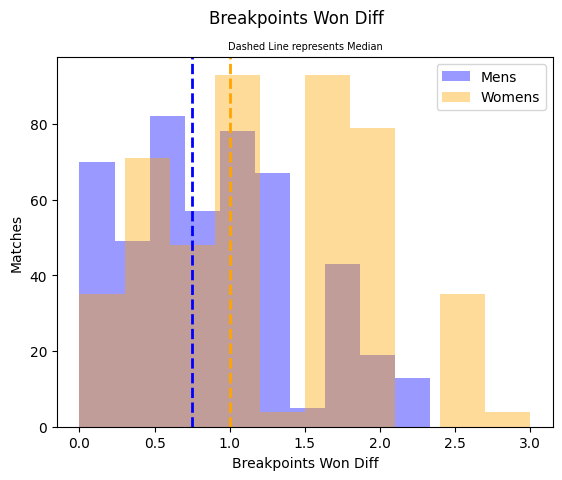

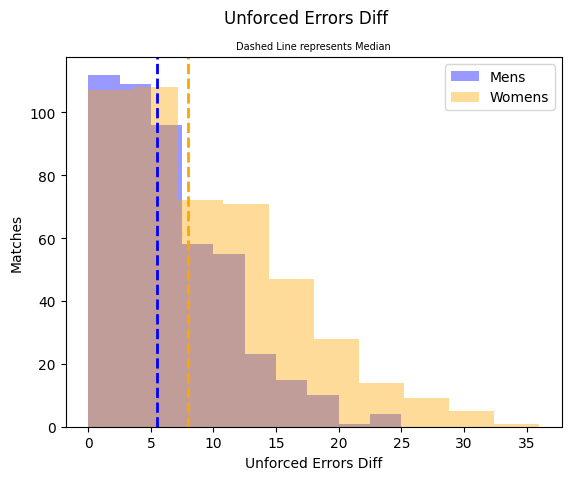

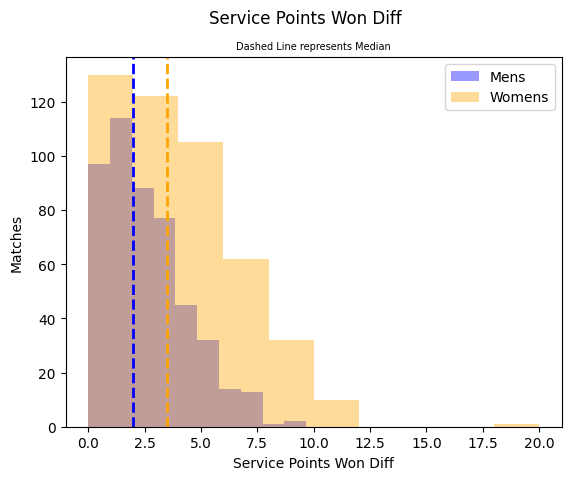

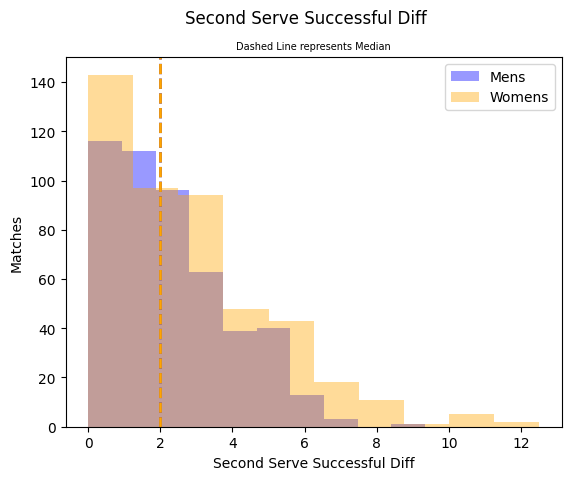

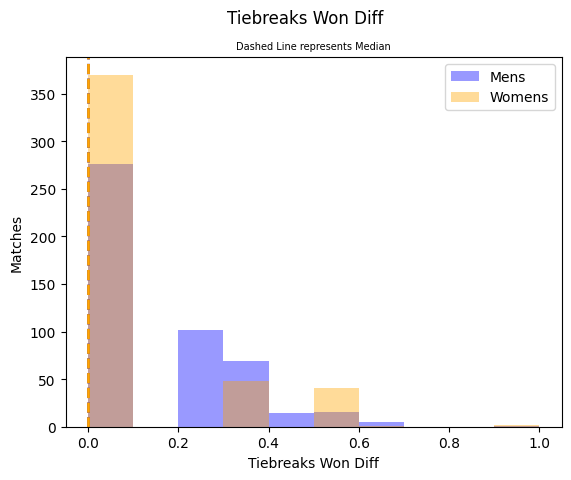

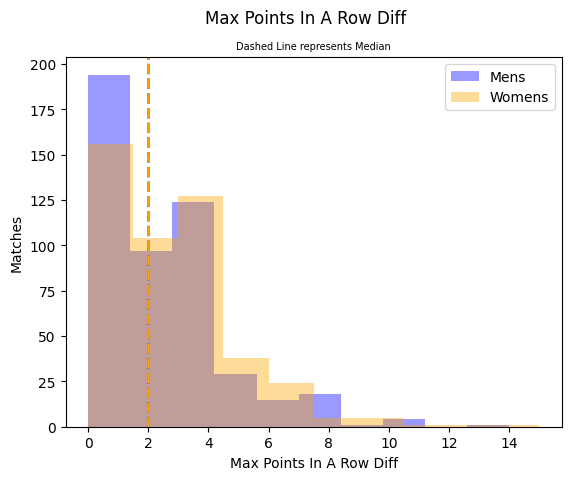

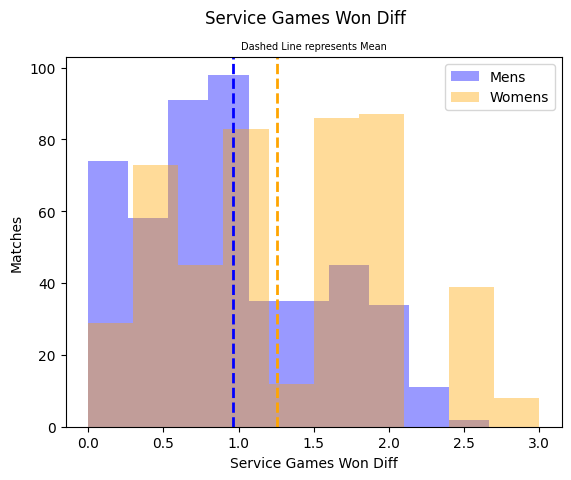

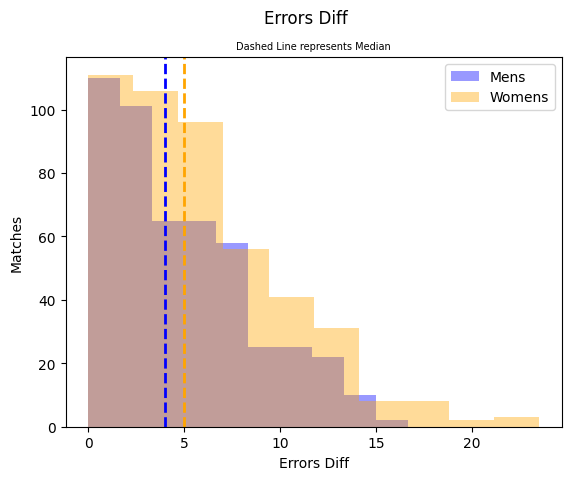

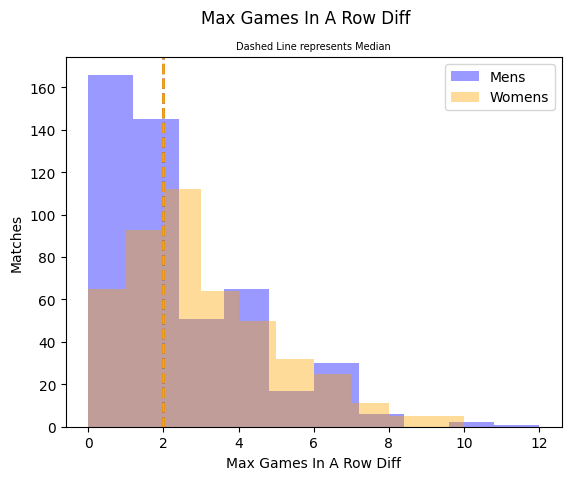

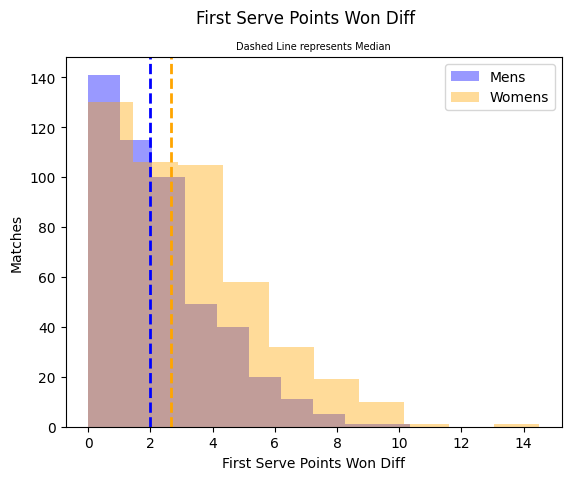

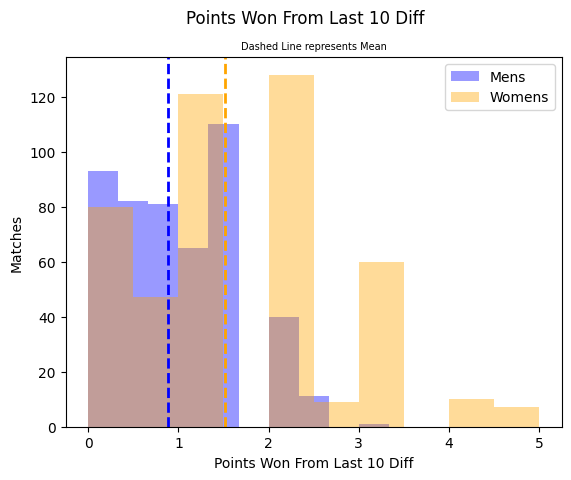

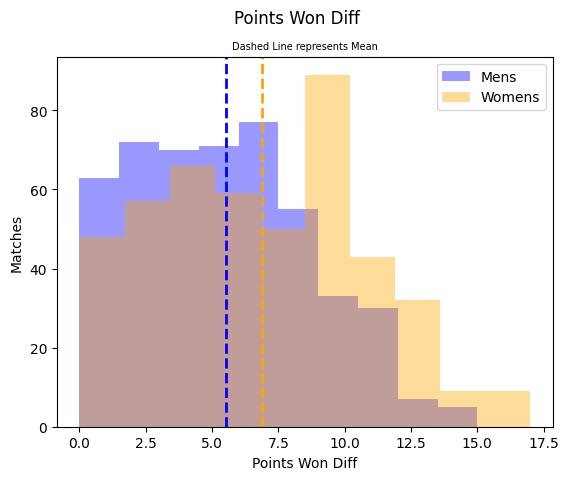

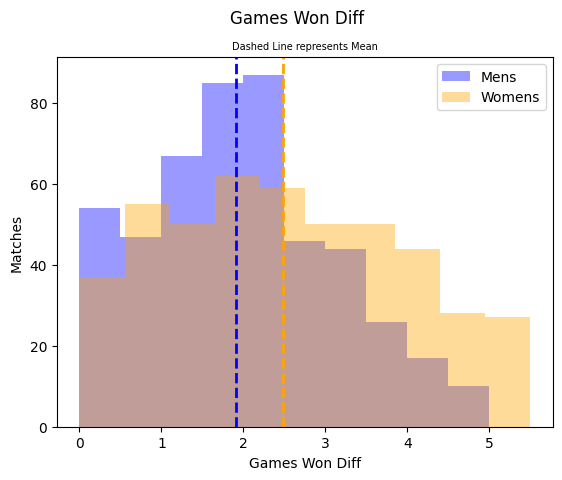

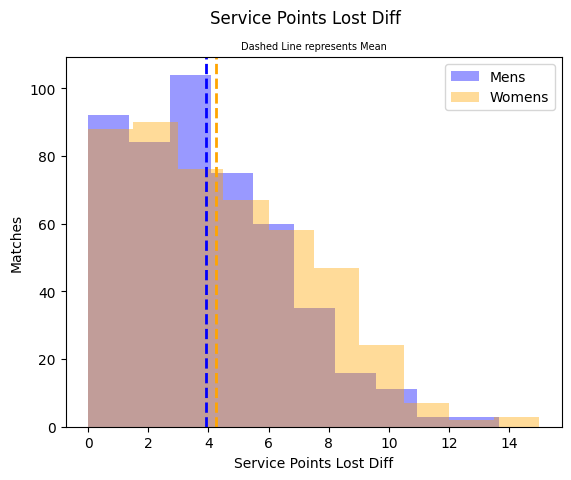

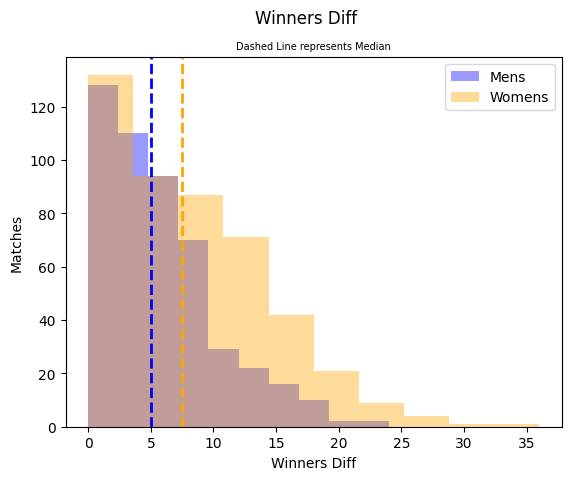

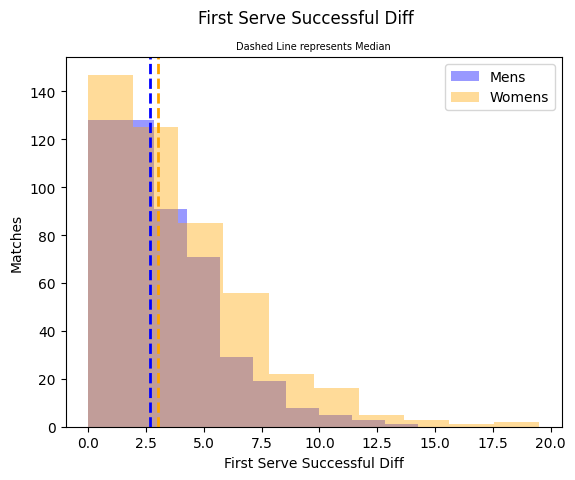

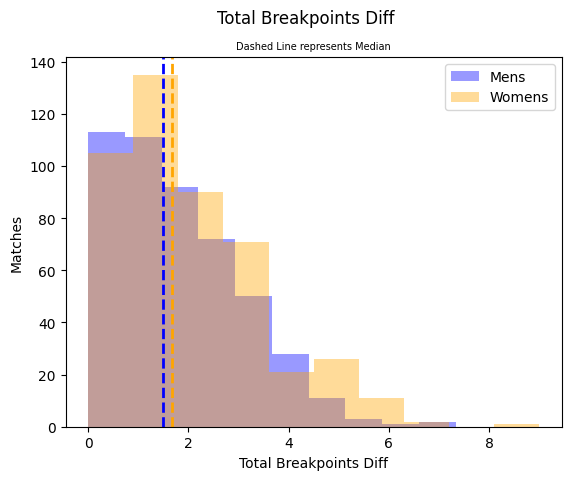

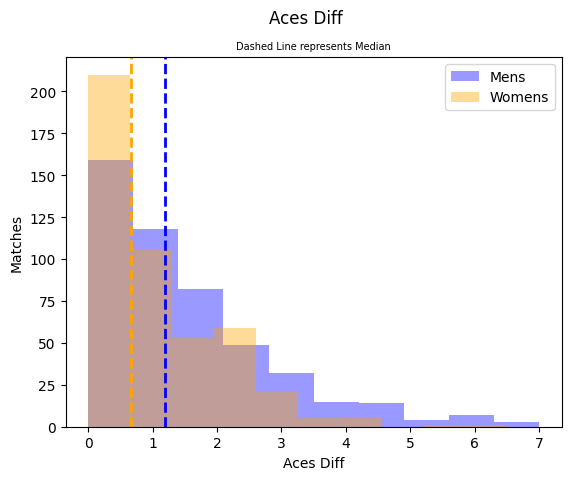

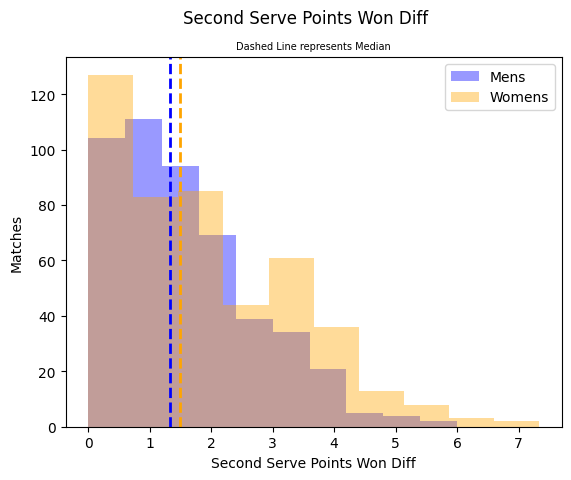

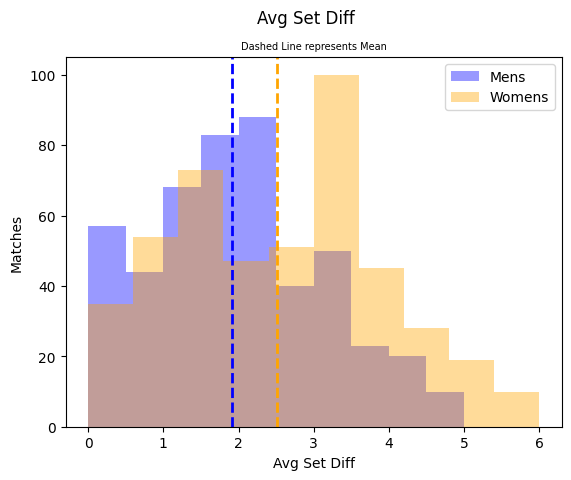

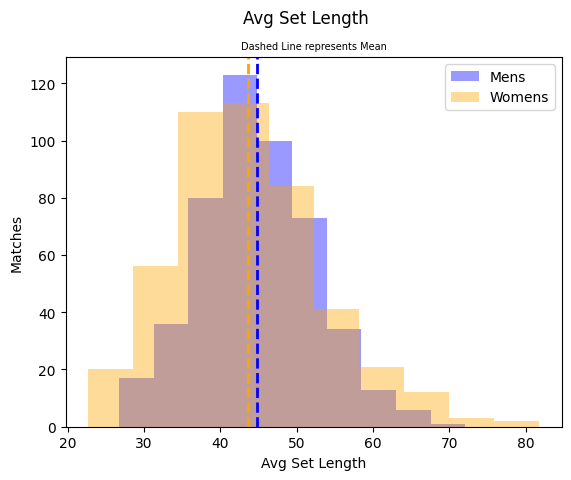

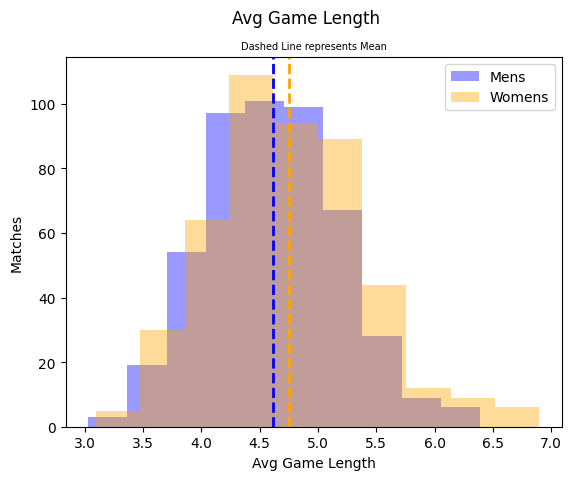

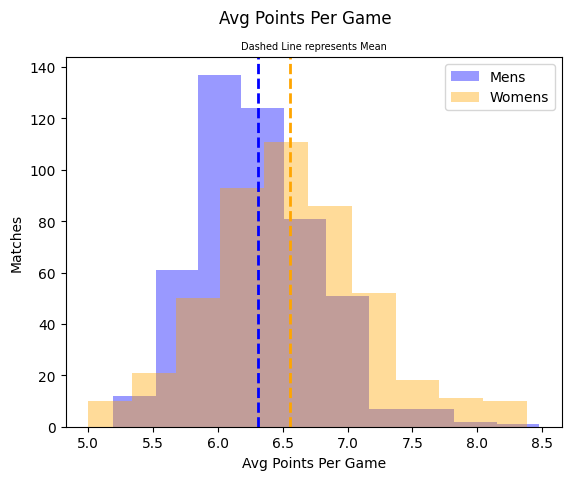

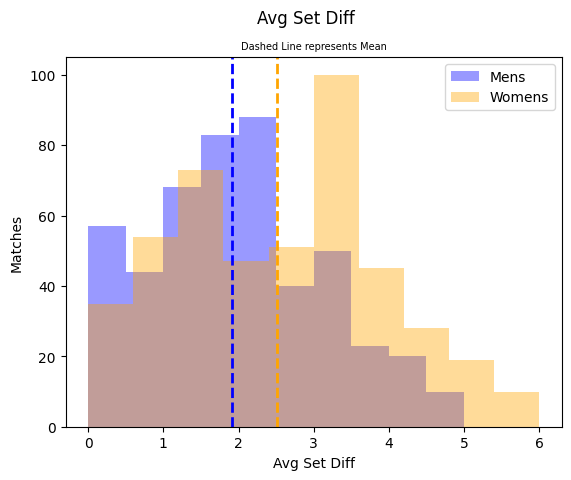

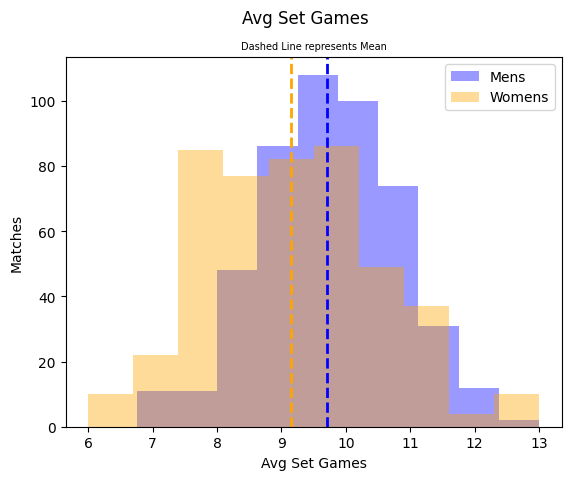

In [130]:
for feature in features1:
    plt_dist(stats, feature)

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
# Separating out the features
x = stats.loc[:, features1].values

# Separating out the target
y = stats.loc[:,"men"].values.astype(int)

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [143]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalized_features = pd.DataFrame(x,columns=feat_cols)
normalized_features.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24
940,0.435831,-1.228763,-0.622797,-0.921426,-0.622721,0.695848,-0.158350,1.699261,0.278599,-0.807254,...,-0.876020,0.072761,0.036107,-0.808185,0.093317,1.333024,1.799203,0.714847,0.093317,0.184545
941,0.435831,-1.228763,1.613841,1.754890,-0.622721,0.215865,0.808319,1.128527,-0.223836,-0.650312,...,-0.876020,-1.134601,-0.241300,2.996221,0.598024,0.661710,1.434688,0.024070,0.598024,-0.353753
942,-0.056825,0.336687,0.076152,-0.586887,1.267950,0.695848,0.324985,-0.176009,0.781035,0.605223,...,-0.523301,0.555706,-1.073519,-0.554558,0.345671,1.079770,1.122497,0.484818,0.345671,0.453694
943,-0.795808,-0.068170,-0.483007,0.249462,0.795282,0.215865,-0.520851,0.578176,-0.223836,-0.924961,...,-0.258761,-1.013865,0.798975,-0.934998,-0.537566,0.627826,0.905338,0.835914,-0.537566,0.049971
944,-0.549480,-0.742933,0.355732,0.751271,1.267950,0.695848,0.324985,0.313192,-0.223836,-1.121138,...,-0.053008,-0.651656,-0.518706,1.728086,0.093317,2.461213,2.747884,0.909378,0.093317,0.722843


In [144]:
from sklearn.decomposition import PCA
pca_features1 = PCA(n_components=2)
principalComponents_features1 = pca_features1.fit_transform(x)

In [145]:
principal_features1_df = pd.DataFrame(data = principalComponents_features1
             , columns = ['principal component 1', 'principal component 2'])
principal_features1_df.tail()

,principal component 1,principal component 2
940,-0.749570,0.301532
941,1.108652,1.554882
942,0.276376,1.207908
943,-1.941488,0.467296
944,-1.203952,2.917406


In [146]:
print('Explained variation per principal component: {}'.format(pca_features1.explained_variance_ratio_))

Explained variation per principal component: [0.34077095 0.10193237]


<Figure size 640x480 with 0 Axes>

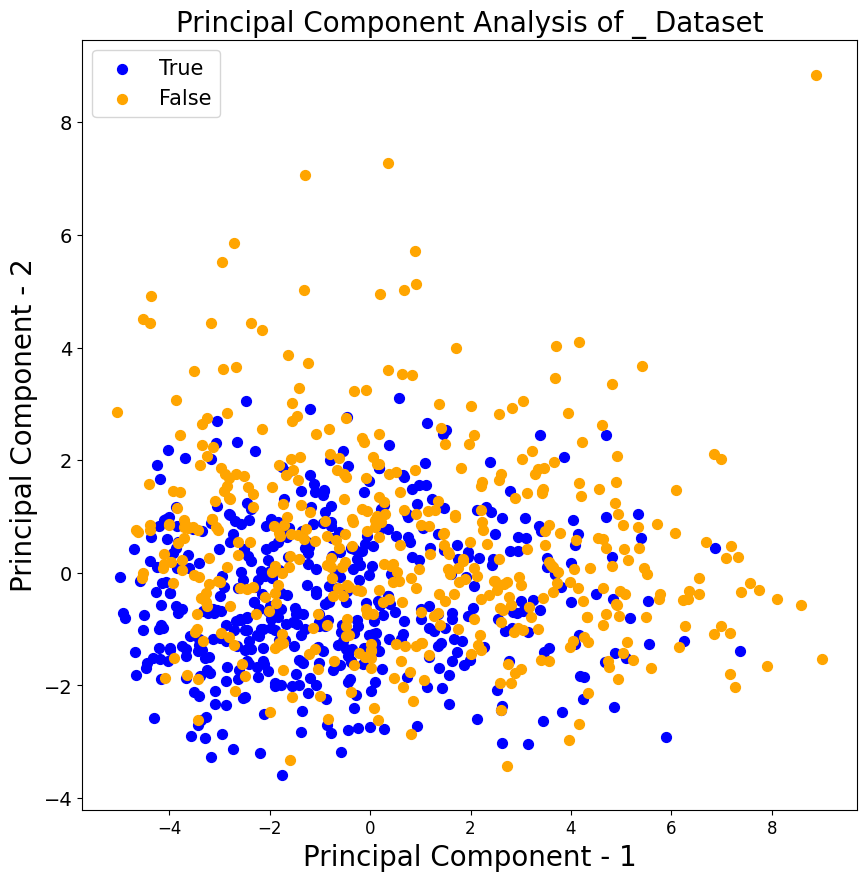

In [153]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of _ Dataset",fontsize=20)
targets = [True, False]
colors = ['blue', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = stats['men'] == target
    plt.scatter(principal_features1_df.loc[indicesToKeep, 'principal component 1'], principal_features1_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [46]:
stats.to_csv("data/df_progress.csv",index=False)